###패키지 import & data 불러오기

In [ ]:
### colab 사용 시 실행
from google.colab import drive
drive.mount('/content/gdrive/')
import os
os.chdir('gdrive/My Drive/Google Colaboratory/kakao_arena/kakao_arena_melon/src/ipynb')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
import sys
sys.path.append('../')
from basic_utils import *

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
data_path = '../../../1_melon_playlist/data/'   # data 경로

train = pd.read_json(data_path+'train.json')
val = pd.read_json(data_path+'val.json')
# test = pd.read_json(data_path+'test.json')
song_meta = load_json(data_path+'song_meta.json')
# genre_gn_all = pd.read_json(data_path+'genre_gn_all.json', typ = 'series')

### make_file.ipynb 내에서 만들어진 tag_song_dict / song_tag_dict 불러오기
# tag_song_dict = load_json(data_path+'tag_song_dict_no0.json')
# song_tag_dict = load_json(data_path+'song_tag_dict.json')

In [ ]:
no_song_idx, no_tag_idx, no_both_idx, yes_all_idx = check_target_type(val)

노래 X 태그 O : 2630개
노래 O 태그 X : 9661개
노래 X 태그 X : 1749개
노래 O 태그 O : 8975개


In [ ]:
## 연도 변수 생성
train['year'] = train['updt_date'].apply(lambda x: int(x[0:4]))
val['year'] = val['updt_date'].apply(lambda x: int(x[0:4]))

year_list = list(train['year'].unique())
year_list = sorted(year_list)

In [ ]:
year_list

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

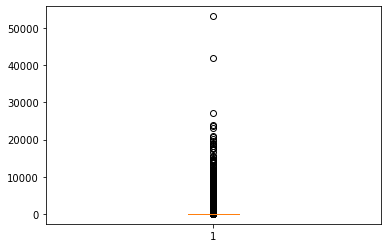

In [ ]:
plt.boxplot(train['like_cnt'])
plt.show()

In [ ]:
### 최대값 outlier가 너무 큰데...
train['like_cnt'].describe()

count    115071.000000
mean         95.197687
std         560.653757
min           0.000000
25%           2.000000
50%           7.000000
75%          24.000000
max       53211.000000
Name: like_cnt, dtype: float64

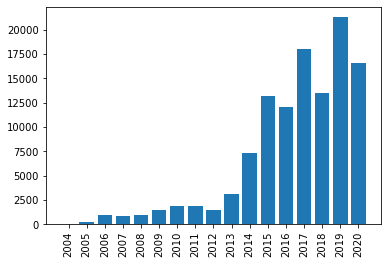

In [ ]:
### 연도별 플레이리스트 개수 : 점점 증가하는 추세
year_cnt = train.groupby('year').count()['id']
plt.bar(year_cnt.index.astype('str'), year_cnt)
plt.xticks(rotation=90)
plt.show()

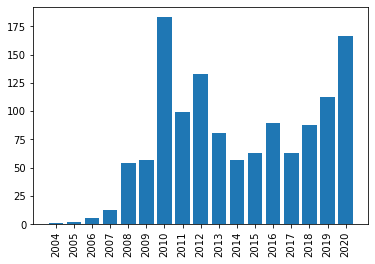

In [ ]:
### 연도별 좋아요 개수 : 오래됐다고 딱히 많지는 않음
year_like_cnt = train.groupby('year').mean()['like_cnt']
# display(year_like_cnt)
plt.bar(year_like_cnt.index.astype('str'), year_like_cnt)
plt.xticks(rotation=90)
plt.show()

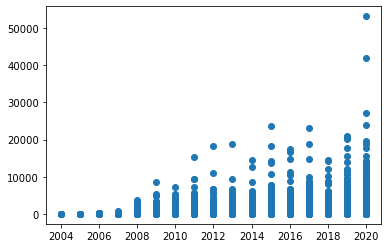

In [ ]:
plt.scatter(train['year'], train['like_cnt'])
plt.show()

In [ ]:
train.sort_values(by=['like_cnt'],ascending=False).head(30)[['id','plylst_title','tags','songs','like_cnt','updt_date']]

,id,plylst_title,tags,songs,like_cnt,updt_date
46524,74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]","[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000
85071,122388,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]","[532771, 383775, 432753, 176384, 152694, 60126...",41844,2020-04-23 20:58:45.000
102651,26174,듣다보면 '우와!' 하고 제목을 보게되는 팝,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]","[40160, 20039, 561488, 20051, 16242, 256568, 7...",27268,2020-04-19 21:22:11.000
101464,72658,"약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]","[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...","[111779, 406878, 417725, 129878, 357770, 34879...",23965,2020-04-22 16:05:39.000
59894,113501,감성이 터지는 팝음악들,"[힐링, 휴식, 기분전환]","[342524, 1233, 417666, 394523, 107455, 17206, ...",23732,2015-07-29 08:25:35.000
32411,72684,신비롭거나 몽환적 느낌이 나는 곡,"[신비로운, 비오는날, 밤, 신비, 몽환, 뉴에이지, 팝]","[282155, 390973, 161304, 281488, 371473, 82671...",23032,2017-04-05 12:52:09.000
31406,38507,♪중독성강한음악들♪,[카페],"[195197, 487343, 434533, 105845, 433543, 45583...",21045,2019-11-29 09:10:58.000
1519,39508,제목이 기억안나서 못들었던 뉴에이지,"[휴식, 밤, 잔잔한, 새벽, 감성, 뉴에이지, 피아노, 밤에듣기좋은노래]","[420205, 229473, 621441, 337447, 291668, 35854...",20677,2019-11-30 23:25:24.000
40950,102123,여자들 취향저격하는 달달한 노래,"[봄, 가을, 달달, 명곡, 힐링, 설렘, 사랑]","[481910, 216728, 460884, 547506, 541420, 10636...",20149,2019-11-08 05:31:14.000
74816,11762,불 꺼진 방 침대 속 자기 직전... 듣기 좋은 노래 ⭐,"[감성, 밤, 여름밤, 새벽감성, 새벽, 밤에듣기좋은노래, 새벽에듣기좋은노래, 잠들...","[13815, 366786, 454528, 451593, 61159, 231078,...",19758,2020-04-17 03:16:32.000


In [ ]:
percent=0.975
like_try = train['like_cnt'].quantile(percent)

## TRAIN
print("train like_cnt over {}% : {}".format(int(percent*100), train[train['like_cnt'] > like_try].shape))
train_like_try = train[train['like_cnt'] > like_try]
# train_tmp.reset_index(inplace = True, drop = True)

train like_cnt over 97% : (2875, 7)


In [ ]:
song_counter = Counter()
for s in train_like_try['songs']:
    song_counter.update(s)

song_dict = pd.DataFrame.from_dict(song_counter, columns=['freq'], orient='index')
print("before ", song_dict.shape)
song_dict = song_dict[song_dict['freq'] >= 5]
print("after ", song_dict.shape)
# tmp_dict.reset_index(inplace = True)

## 5회 이상 등장한 노래만 사용! ==> use_song에 list형태로 담음
song_frequent = list(song_dict.index)

before  (104991, 1)
after  (11065, 1)


In [ ]:
song_dict.join(song_meta[['id','song_name','artist_name_basket']].set_index('id'),how='left').sort_values('freq',ascending=False)[['song_name','artist_name_basket','freq']].head(15)

,song_name,artist_name_basket,freq
366786,가끔 미치도록 네가 안고 싶어질 때가 있어,[가을방학],85
116573,안아줘,[정준일],79
654757,눈의 꽃,[박효신],74
207558,Falling Slowly,[Glen Hansard & Marketa Irglova],72
140867,Someone Like You,[Adele],70
610933,널 생각해,[원 모어 찬스 (one more chance)],67
625875,I`m Not The Only One,[Sam Smith],66
133143,"그대와 나, 설레임 (Feat. 소울맨)",[어쿠스틱 콜라보],64
173943,...사랑했잖아...,[린],62
580074,여전히 아름다운지,[김연우],62


In [ ]:
train_like_try.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,year
13,"[힙합, 느낌있는, 밤, 새벽, RnB, 감각적인, 드라이브, 국내, 그루브한]",89809,트렌디하고 그루브한 힙합/알앤비 MUSIC,"[525152, 38765, 66139, 696379, 397438, 144461,...",1112,2018-01-09 14:01:53.000,2018
40,"[위로, 힐링]",35178,아무것도 위로 되지 못할 때 위로가 되어준 음악,"[512599, 308020, 124485, 296460, 218664, 31395...",1452,2019-06-26 19:49:20.000,2019
177,"[힙합, 랩, 오승훈, GZ, 신나는]",80395,#어디가서 힙알못 소리는 듣지말자 (해외),"[374511, 706915, 163606, 557613, 116795, 15305...",1730,2020-04-22 03:02:38.000,2020
339,"[힙합, 감성힙합, 알앤비, 매장, 드라이브, 국내힙합, 쇼미, HipHop, 인싸...",141805,핵인싸 국내 힙합 플레이리스트 (매일업데이트),"[267735, 527642, 426013, 324348, 323773, 40519...",959,2020-04-23 19:11:55.000,2020
370,"[클래식, playlist3]",151011,Playlist3,"[454523, 24207, 244570, 549076, 633201, 686453...",1919,2018-10-20 02:17:06.000,2018


In [ ]:
# song_set = set()
# for s in train_like_try['songs']:
#     song_set.update(s)

In [ ]:
# ### 너무 오래 걸림...
# df = pd.DataFrame(index=list(song_set))
# for idx, k in tqdm(train_like_try.iterrows()):
#     df[k['id']] = [1 if song_id in k['songs'] else 0 for song_id in df.index]

In [ ]:
def before_pivot(data):
    result = []
    start = time.time()  # 시작 시간 저장     
    
    for i in tqdm(data.index):
        for song in data.loc[i]['songs']:
            if song in song_frequent:
                
                df = pd.DataFrame({
                            'id' : [data.loc[i:i, 'id'].values[0]],
                            'song' : [song],
                            'point' : 1
                        })
                result += [df]

    final_result = pd.concat(result)
    print(final_result.shape)
    end = time.time()  # 시작 시간 저장     
    print("spend time ", round((end-start)/60, 2))
    return final_result

In [ ]:
train_df = before_pivot(train_like_try)
print('complete train')
# val_df = before_pivot(val_tmp)

# del train_tmp 
gc.collect()

100%|██████████| 2875/2875 [02:47<00:00, 17.12it/s]


(111753, 3)
spend time  3.04
complete train


0

In [ ]:
# all_df = pd.concat([train_df, val_df])
# all_df = train_df.copy()
all_df = train_df.pivot(index = 'song', columns ='id', values = 'point').fillna(0)
all_df.columns = all_df.columns.astype(str)

In [ ]:
all_df.shape

(11065, 2703)

In [ ]:
all_df.to_parquet(data_path+'train_DF.parquet')